Mounted at /content/drive
Found 312 images belonging to 4 classes.
Found 75 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


9/9 ━━━━━━━━━━━━━━━━━━━━ 131s 6s/step - accuracy: 0.2271 - loss: 1.6603 - val_accuracy: 0.2812 - val_loss: 1.3638
Epoch 2/10
1/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.2188 - loss: 1.4585

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 287ms/step - accuracy: 0.2188 - loss: 1.4585 - val_accuracy: 0.1818 - val_loss: 1.4293
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.2568 - loss: 1.3781 - val_accuracy: 0.2500 - val_loss: 1.3707
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3125 - loss: 1.3735 - val_accuracy: 0.4545 - val_loss: 1.3482
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.3818 - loss: 1.3601 - val_accuracy: 0.4844 - val_loss: 1.2756
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3750 - loss: 1.2932 - val_accuracy: 0.1818 - val_loss: 1.4273
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.4212 - loss: 1.2663 - val_accuracy: 0.3906 - val_loss: 1.1916
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.4167 - loss: 1.1632 - val_accuracy: 0.4545 - val_loss: 1.1367
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.4135 - loss: 1.2963 - val_accuracy: 0.4688 - val_loss: 1.1077
Epoch 10/10
9/

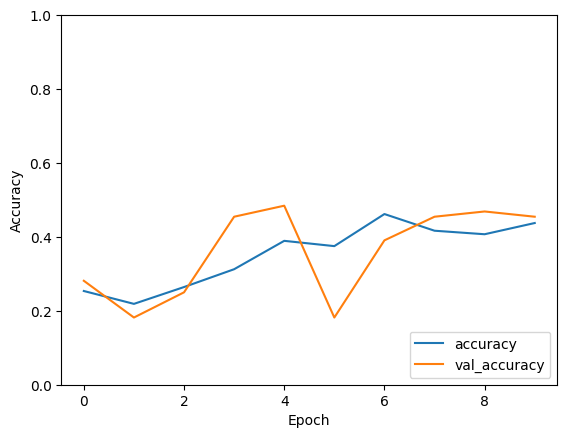

In [1]:
# prompt: Apply image classification techniques on it(conventional and CNN) to train a model that can classify vehicles from their images.

from google.colab import drive
drive.mount('/content/drive')

base_dir = "/content/drive/MyDrive/ML Lab/Lab Project/Dataset"

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% for validation
)


train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


# CNN Model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax') # Output layer with number of classes
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10, # Adjust the number of epochs as needed
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator, verbose=0)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

# Plot training history (optional)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 312 images belonging to 4 classes.
Found 75 images belonging to 4 classes.
Class names: ['Bus', 'Car', 'Truck', 'motorcycle']
Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.2963 - loss: 11.1914 - val_accuracy: 0.2267 - val_loss: 2.0915 - learning_rate: 0.0010
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.3987 - loss: 6.6183 - val_accuracy: 0.2533 - val_loss: 2.2807 - learning_rate: 0.0010
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.4059 - loss: 4.1863 - val_accuracy: 0.2667 - val_loss: 3.7986 - learning_rate: 0.0010
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4336 - loss: 2.7254
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.4301 - loss: 2.7423 - val_accuracy: 0.3600 - val_loss: 4.0462 - learning_ra

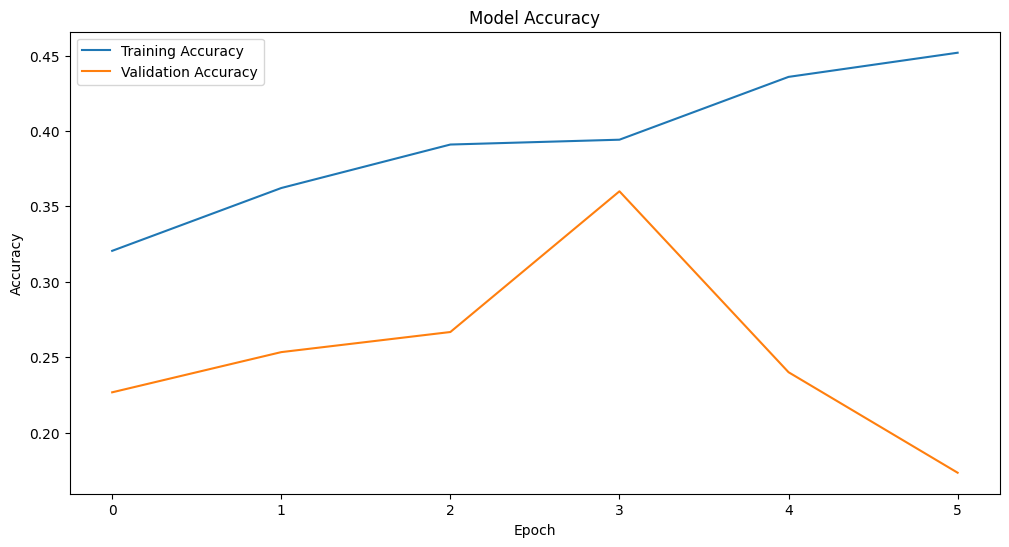

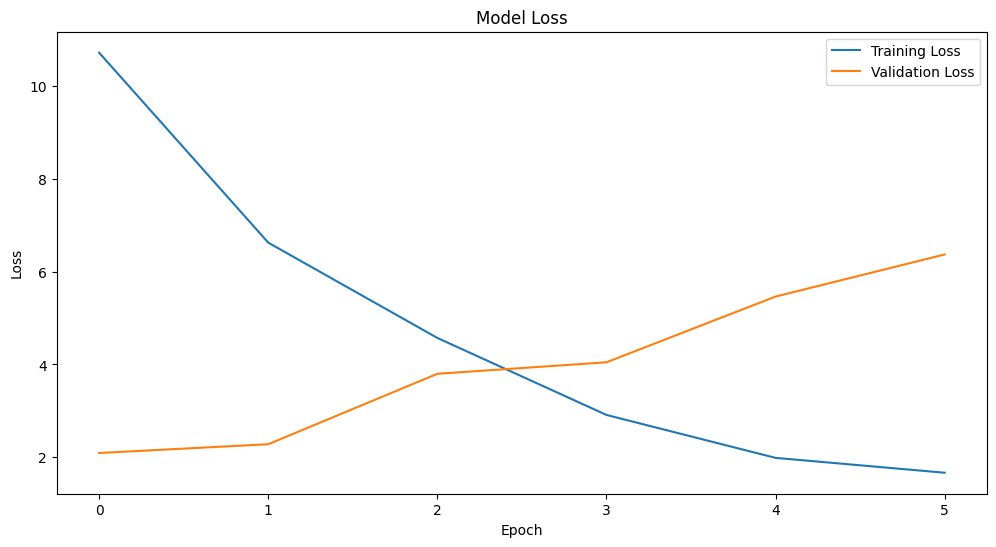

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 973ms/step - accuracy: 0.2055 - loss: 2.0922
Validation Accuracy: 20.00%


In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

# Set parameters
image_size = (128, 128)
batch_size = 32
epochs = 30

# Define dataset path
from google.colab import drive
drive.mount('/content/drive')

dataset_path = "/content/drive/MyDrive/ML Lab/Lab Project/Dataset"

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values
    validation_split=0.2,  # 20% of data for validation
    rotation_range=30,  # Rotate images by up to 30 degrees
    width_shift_range=0.2,  # Horizontal shifts
    height_shift_range=0.2,  # Vertical shifts
    shear_range=0.2,  # Shear transformations
    zoom_range=0.3,  # Zoom transformations
    horizontal_flip=True,  # Flip images horizontally
    fill_mode="nearest",  # Fill empty pixels with nearest values
)

# Load training and validation datasets
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    seed=42,
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    seed=42,
)

# Get class names
class_names = list(train_data.class_indices.keys())
print(f"Class names: {class_names}")

# Build the enhanced CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax'),
])

# Compile the model with an adaptive learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for learning rate adjustment and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
    callbacks=[reduce_lr, early_stopping],
)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 50s 4s/step - accuracy: 0.1995 - loss: 1.6102 - val_accuracy: 0.2667 - val_loss: 1.3780 - learning_rate: 0.0010
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.2887 - loss: 1.4603 - val_accuracy: 0.3600 - val_loss: 1.3793 - learning_rate: 0.0010
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.2847 - loss: 1.4477 - val_accuracy: 0.3333 - val_loss: 1.3752 - learning_rate: 0.0010
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.2419 - loss: 1.4539 - val_accuracy: 0.4800 - val_loss: 1.3423 - learning_rate: 0.0010
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.2320 - loss: 1.4447 - val_accuracy: 0.4000 - val_loss: 1.3433 - learning_rate: 0.0010
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 0.3083 - loss: 1.3925 - val_accuracy: 0.3733 - val_loss: 1.3378 - learning_rate: 0.0010
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 54s 5s/step

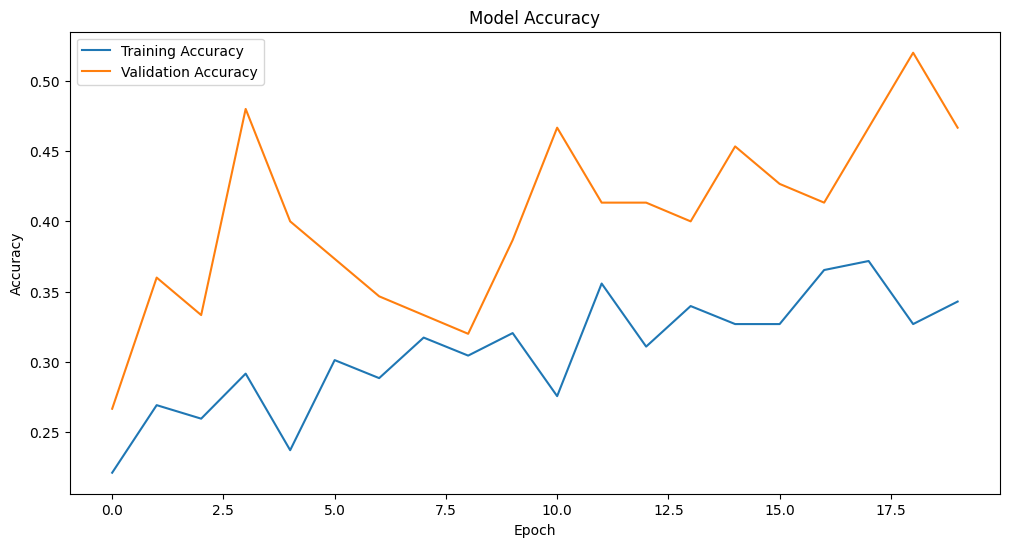

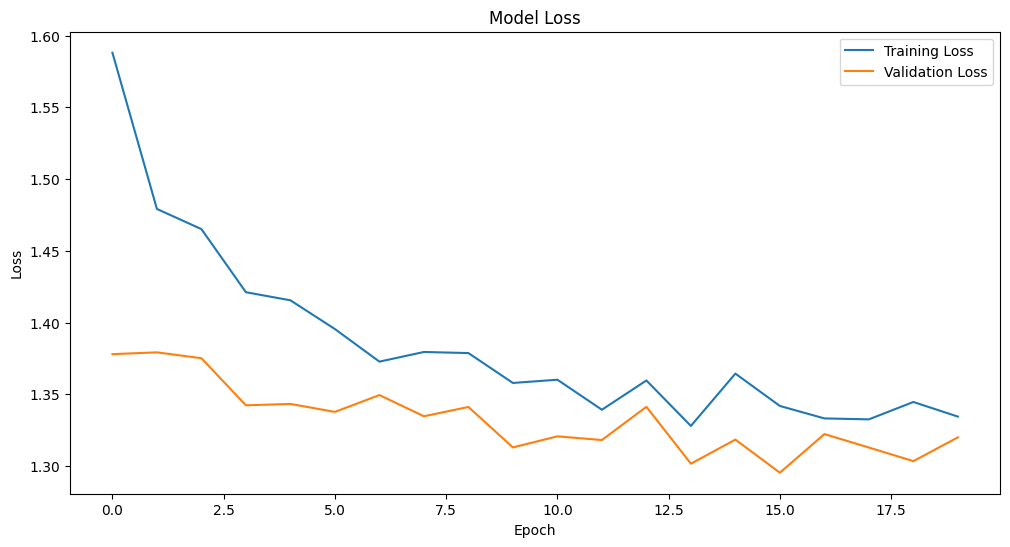

3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.4477 - loss: 1.2923
Validation Accuracy: 42.67%


In [3]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D

# Load the pretrained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(class_names), activation='softmax')(x)

# Define the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[reduce_lr, early_stopping],
)

# Plot training/validation accuracy and loss as before
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


Found 312 images belonging to 4 classes.
Found 75 images belonging to 4 classes.
Class names: ['Bus', 'Car', 'Truck', 'motorcycle']
Extracting training features...


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Extracting validation features...
Applying PCA to training features...
Applying PCA to validation features...
Training Random Forest Classifier...
Evaluating the model...
Validation Accuracy with Feature Engineering: 63.55%

Classification Report:
              precision    recall  f1-score   support

         Bus       0.54      0.52      0.53        27
         Car       0.66      0.72      0.69        29
       Truck       0.61      0.44      0.51        25
  motorcycle       0.71      0.85      0.77        26

    accuracy                           0.64       107
   macro avg       0.63      0.63      0.63       107
weighted avg       0.63      0.64      0.63       107



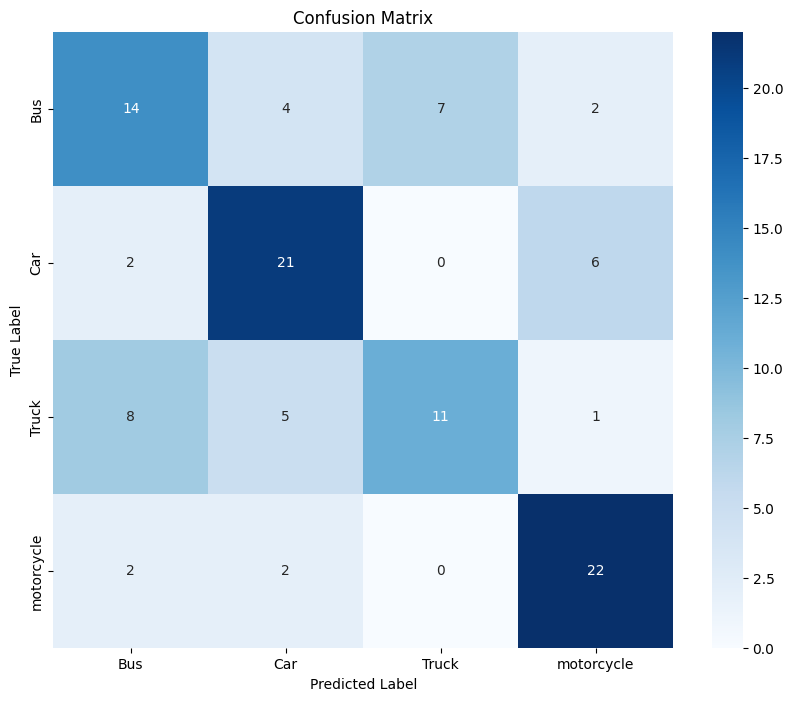

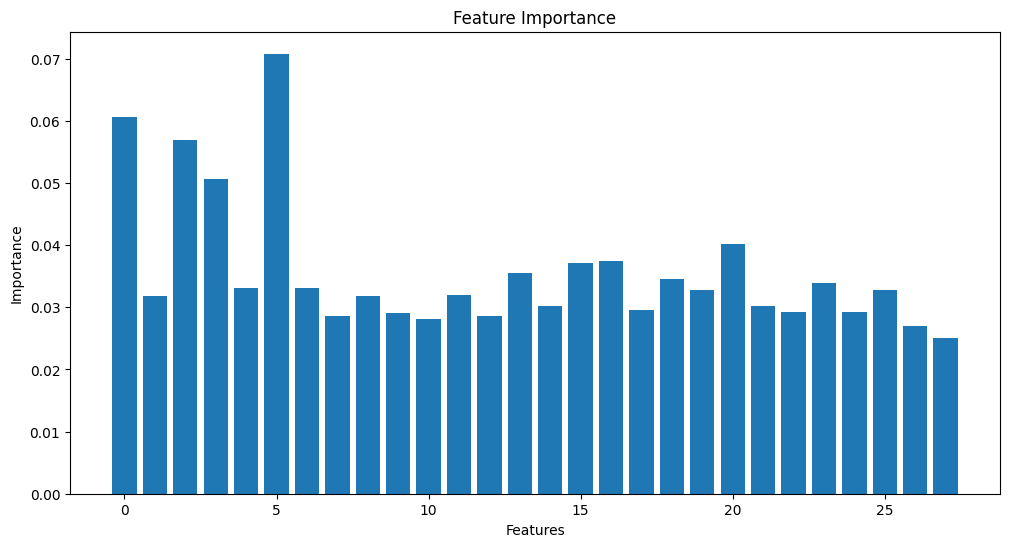

In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Set parameters
image_size = (128, 128)
batch_size = 32

# Define dataset path
dataset_path = "/content/drive/MyDrive/ML Lab/Lab Project/Dataset"

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values
    validation_split=0.2,  # 20% of data for validation
)

# Load training and validation datasets
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    seed=42,
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    seed=42,
)

# Get class names
class_names = list(train_data.class_indices.keys())
print(f"Class names: {class_names}")

# Load ResNet50 without the top layer
feature_extractor = ResNet50(weights='imagenet', include_top=False, pooling='avg', input_shape=(image_size[0], image_size[1], 3))

# Extract features from images
def extract_features(data_generator):
    features = []
    labels = []
    for batch_images, batch_labels in data_generator:
        batch_features = feature_extractor.predict(batch_images, verbose=0)
        features.append(batch_features)
        labels.append(batch_labels)
        if len(features) * batch_images.shape[0] >= data_generator.samples:
            break
    features = np.vstack(features)
    labels = np.vstack(labels)
    return features, labels

# Extract features from training and validation data
print("Extracting training features...")
train_features, train_labels = extract_features(train_data)
print("Extracting validation features...")
val_features, val_labels = extract_features(val_data)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Retain 95% variance
print("Applying PCA to training features...")
train_features_pca = pca.fit_transform(train_features)
print("Applying PCA to validation features...")
val_features_pca = pca.transform(val_features)

# Train a Random Forest Classifier on extracted features
print("Training Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(train_features_pca, np.argmax(train_labels, axis=1))

# Make predictions and evaluate
print("Evaluating the model...")
val_predictions = rf_model.predict(val_features_pca)
val_accuracy = accuracy_score(np.argmax(val_labels, axis=1), val_predictions)
print(f"Validation Accuracy with Feature Engineering: {val_accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(np.argmax(val_labels, axis=1), val_predictions, target_names=class_names))

# Confusion matrix
conf_matrix = confusion_matrix(np.argmax(val_labels, axis=1), val_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Feature importance (if PCA is skipped, directly from Random Forest)
importances = rf_model.feature_importances_
plt.figure(figsize=(12, 6))
plt.bar(range(len(importances)), importances)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


Found 312 images belonging to 4 classes.
Found 75 images belonging to 4 classes.
Class names: ['Bus', 'Car', 'Truck', 'motorcycle']
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - accuracy: 0.2582 - loss: 2.1120 - val_accuracy: 0.3867 - val_loss: 1.4519
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.3346 - loss: 1.3549 - val_accuracy: 0.5067 - val_loss: 1.1986
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.4920 - loss: 1.1767 - val_accuracy: 0.5067 - val_loss: 1.1179
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.5381 - loss: 1.0969 - val_accuracy: 0.5733 - val_loss: 1.0598
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.5934 - loss: 1.0081 - val_accuracy: 0.5467 - val_loss: 1.0622
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.5834 - loss: 0.9540 - val_accuracy: 0.5867 - val_loss: 1.0653
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.6642 - loss: 0.9124 - val_accuracy: 0.5467 - val_loss: 1.0141
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.7099 - loss: 0.8077 - val_accuracy: 0.6400 - val_loss: 0.9254
Epo

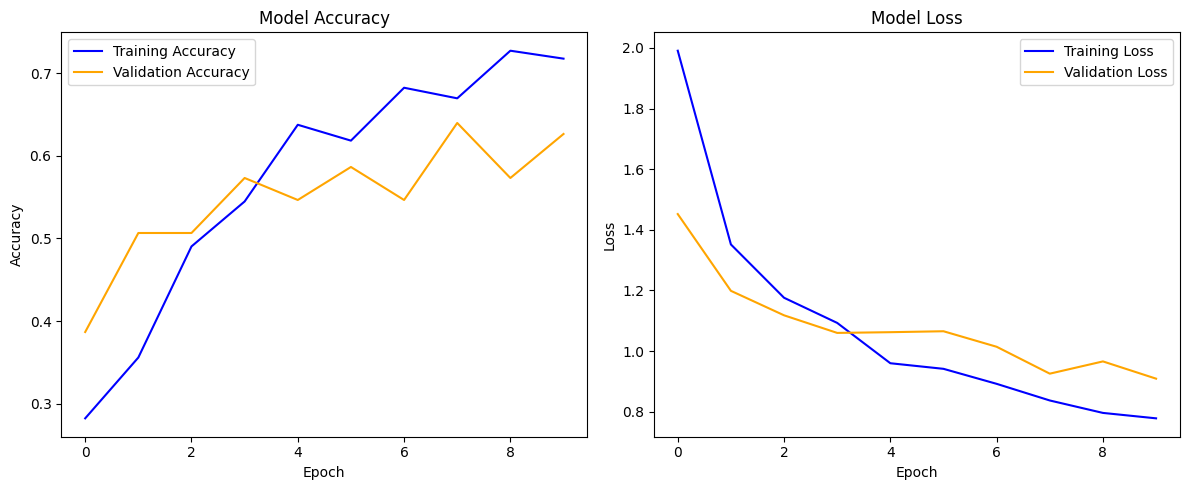

Final Validation Accuracy: 62.67%
Final Validation Loss: 0.9089


In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras import Sequential

# Set parameters
image_size = (128, 128)
batch_size = 32
dataset_path = "/content/drive/MyDrive/ML Lab/Lab Project/Dataset"

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values
    validation_split=0.2,  # 20% of data for validation
)

# Load training and validation datasets
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    seed=42,
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    seed=42,
)

# Get class names
class_names = list(train_data.class_indices.keys())
print(f"Class names: {class_names}")

# Load ResNet50 without the top layer for feature extraction
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(128, 128, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation="relu")(x)
output = Dense(len(class_names), activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=output)

# Freeze ResNet50 layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    batch_size=batch_size,
    verbose=1,
)

# Plot Training and Validation Accuracy/Loss
plt.figure(figsize=(12, 5))

# Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy", color="blue")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", color="orange")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss", color="blue")
plt.plot(history.history["val_loss"], label="Validation Loss", color="orange")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# Final Validation Accuracy and Loss
val_loss, val_accuracy = model.evaluate(val_data, verbose=0)
print(f"Final Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Final Validation Loss: {val_loss:.4f}")
